<div style='background-image: url("main.png") ; padding: 0px ; background-size: cover ; border-radius: 5px ; height: 200px ; width: 100%'>
    <div style="float: right ; margin: 20px ; padding: 20px ; background: rgba(255 , 255 , 255 , 0.9) ; width: 50% ; height: 150px">
        <div style="position: relative ; top: 50% ; transform: translatey(-50%)">
            <div style="font-size: xx-large ; font-weight: 900 ; color: rgba(0 , 0 , 0 , .8) ; line-height: 100%">TP : dilatation thermique de l'eau
            </div>
            <div style="font-size: large ; padding-top: 20px ; color: rgba(0 , 0 , 0 , 0.5)">Notes de calcul
             </div>
        </div>
    </div>
</div>

In [1]:
# commande permettant d'insérer les figures matplotlib dans les notebooks
%matplotlib notebook

# import des librairies 
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit

# Mesures

In [2]:
# propriétés de l'eau utilisée
beta_exp = 3.01e-4

# données expérimentales
V0, u_V0 = 300.e-6, .5e-6 # volume exprimé en m^3
d, u_d = 3.7e-3, 0.05e-3 # diamètre du piquage exprimé en m

In [3]:
## Données expérimentales étudiants
# Hauteur d'eau relevée en cm
H = np.array([0, 0.9, 2.1, 4, 6.3, 9.4, 13.7, 18.1, 23.4, 29.30, 34.9, 39.4])/100
u_H = np.array(len(H)*[.05])/100

# Instants de mesure
t=np.array([0, 60, 120, 180, 240, 300, 360, 420, 480, 540, 600, 660])
u_t=np.array(len(t)*[.001])

# Température mesurée
temp = np.array([20.8, 21.4, 23.1, 25.6, 28.7, 32.2, 36.1, 40.3, 44.2, 48.7, 52.7, 55.2])
u_temp=np.array(len(temp)*[.2])

# Régression linéaire

En supposant que le chauffage de l'eau est fourni par une puissance constante, le premier principe appliqué au système fermé eau, de masse constante, donne : 
$$T(t)=T_0+\dfrac{U^2}{mc_p R}t$$
où $U$ est la tension aux bornes de la résistance $R$ qui permet le chauffage par effet Joule, et $m$ est la masse d'eau utilisée.


<IPython.core.display.Javascript object>


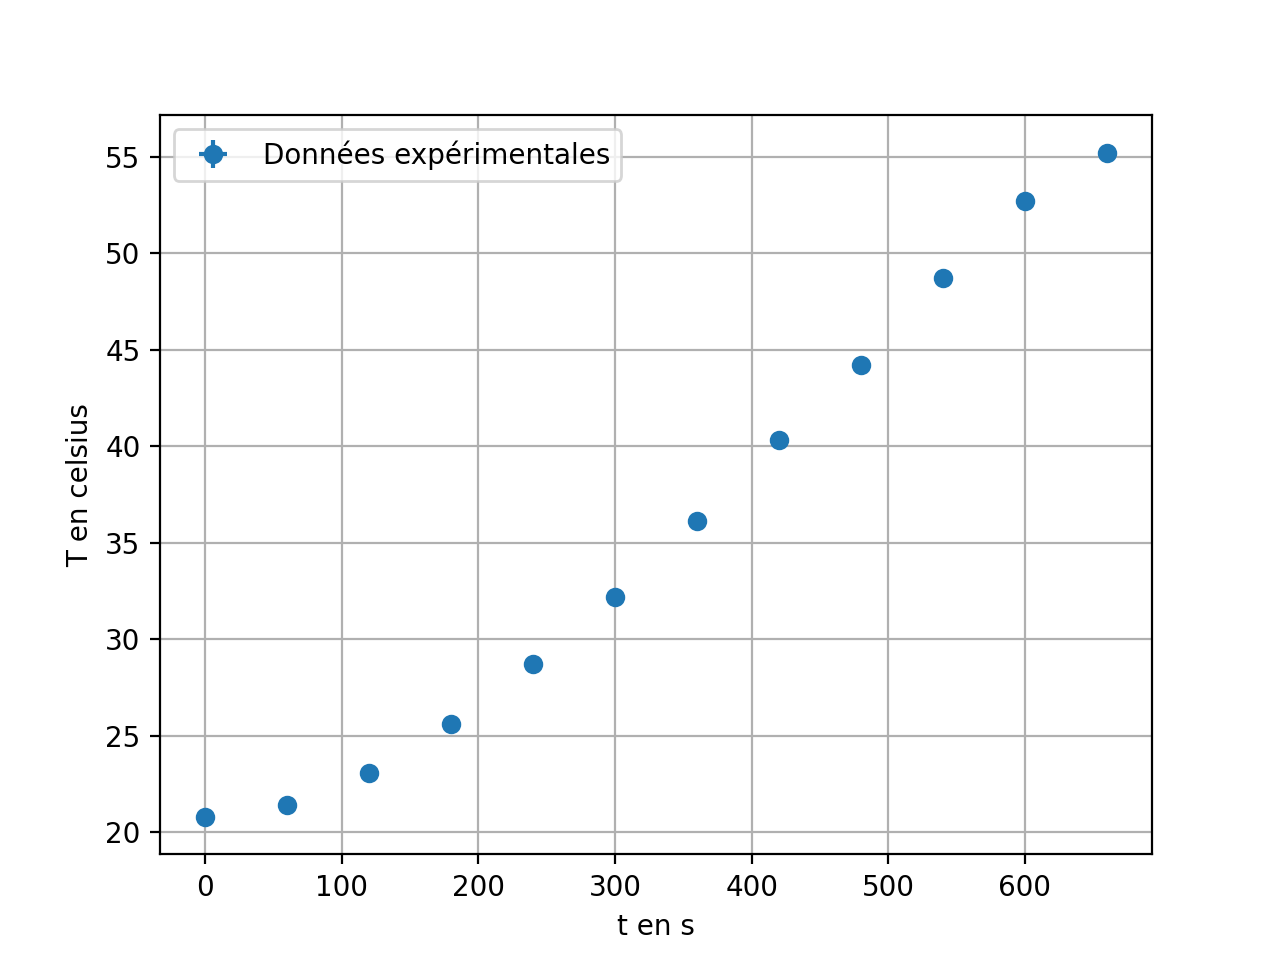

In [4]:
# Tracé des nuages de points et de leurs barres d'incertitude
plt.figure()
plt.errorbar(t, temp, xerr=u_t, yerr = u_temp, fmt='o',label="Données expérimentales")
plt.xlabel("t en s")
plt.ylabel("T en celsius")
plt.legend()
plt.grid(True)
plt.show()

L'aspect linéaire (affine en réalité) semble établi au delà de $t=100~\text{s}$, c'est-à-dire en soustrayant les trois premiers points mesurés, on peut maintenant utiliser la méthode `polyfit` de `numpy` pour proposer un régression linéaire associée à cette collection de points.<br/>

In [5]:
# Paramètres de la simulation de MC
N=10000

# Déclaration des tableaux de stockage
a_fit=[]
b_fit=[]

# Calcul des N pentes et ordonnées à l'orgine par la méthode polyfit de numpy
for i in range(N):
    z=np.polyfit(t[3:]+u_t[3:]*np.random.uniform(-1,1,len(t[3:])), np.array(temp[3:])+np.array(u_temp[3:])*np.random.uniform(-1,1,len(temp[3:])),1)
    a_fit.append(z[0])
    b_fit.append(z[1])

# Calcul de la moyenne et incertitude-type de la pente a et de l'ordonnée à l'origine b
a_fit_moy=np.mean(a_fit)
u_a_fit=np.std(a_fit,ddof=1)

b_fit_moy=np.mean(b_fit)
u_b_fit=np.std(b_fit, ddof=1)

On peut à nouveau tracer la courbe précédente en y rajoutant la droite obtenue par régression linéaire.

<IPython.core.display.Javascript object>


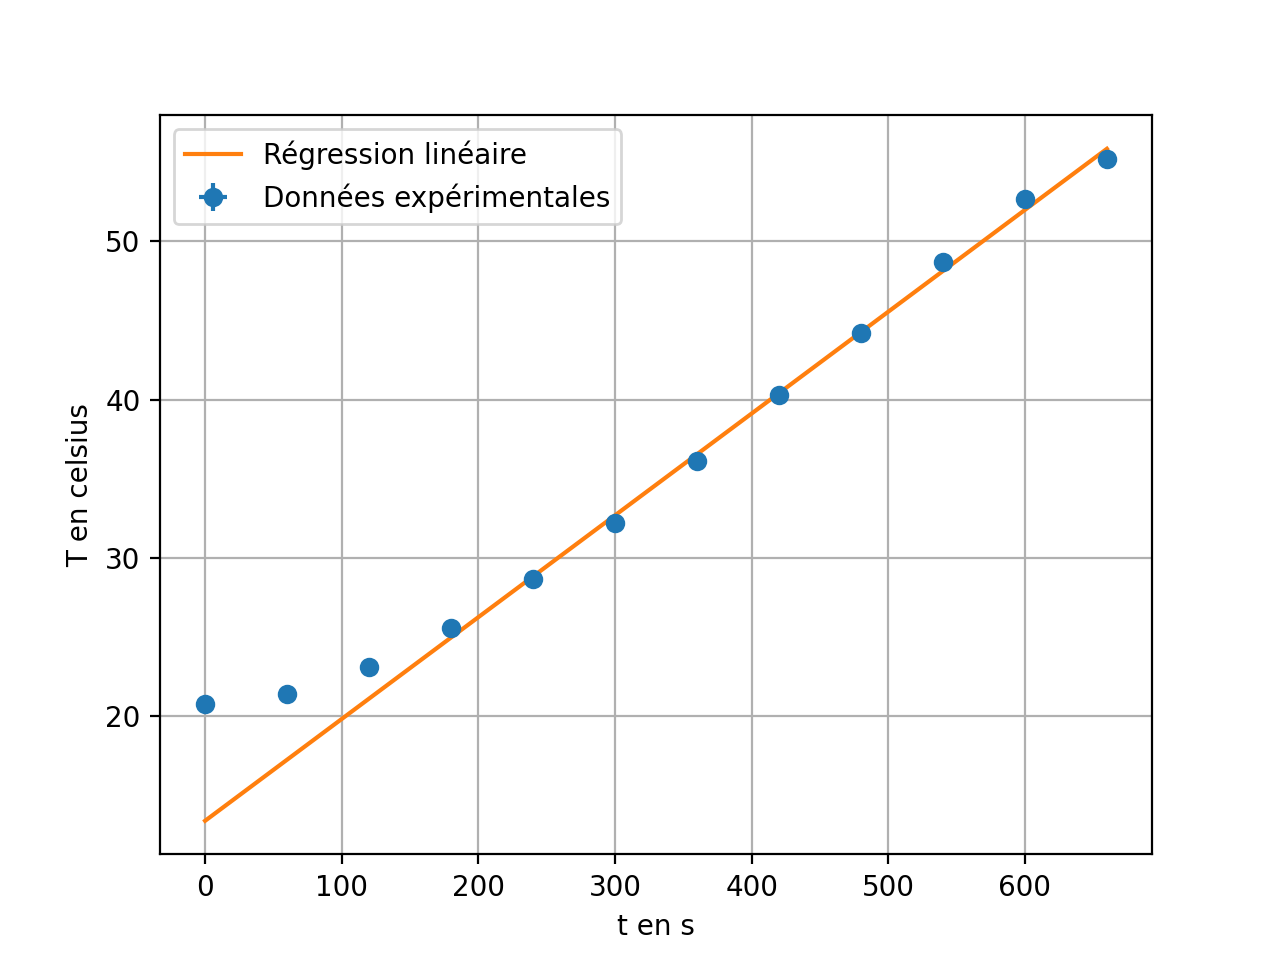

La valeur mesurée de la pente est de  0.06431 C/s


In [6]:
# Calcul du nuage de points associé à la droite de régression calculée précédemment
x=np.linspace(0, np.max(t), 1000)
y=a_fit_moy*x + b_fit_moy

# Tracé du nuage de points associé aux valeurs possibles de mg et de l
plt.figure()
plt.errorbar(t, temp, xerr=u_t, yerr = u_temp, fmt='o' ,label="Données expérimentales")
plt.plot(x,y, label="Régression linéaire")
plt.xlabel("t en s")
plt.ylabel("T en celsius")
plt.legend()
plt.grid(True)
plt.show()

print("La valeur mesurée de la pente est de ",format(a_fit_moy,"#.5f"),"C/s")

La courbe obtenue et la régression linéaire ne sont que partiellement compatibles. La droite de régression ne passe passe pas par chaque point de mesure complété de ces barres d'incertitudes et la distribution des points de part et d'autre de la droite de régression suit une logique qui paraît non aléatoire.</br>

Des dispositifs d'agitation mécanique du système ainsi que d'isolation des parois pourraient éventuellement améliorer ce résultat.

# Régression non linéaire
La définition du coefficient d'expansion isobare permet d'établir que :
$$V(T)=V_0\text{e}^{\beta(T-T_0)}$$

On commence par tracer le nuage de points expérimentaux, pour une première analyse visuelle.

<IPython.core.display.Javascript object>


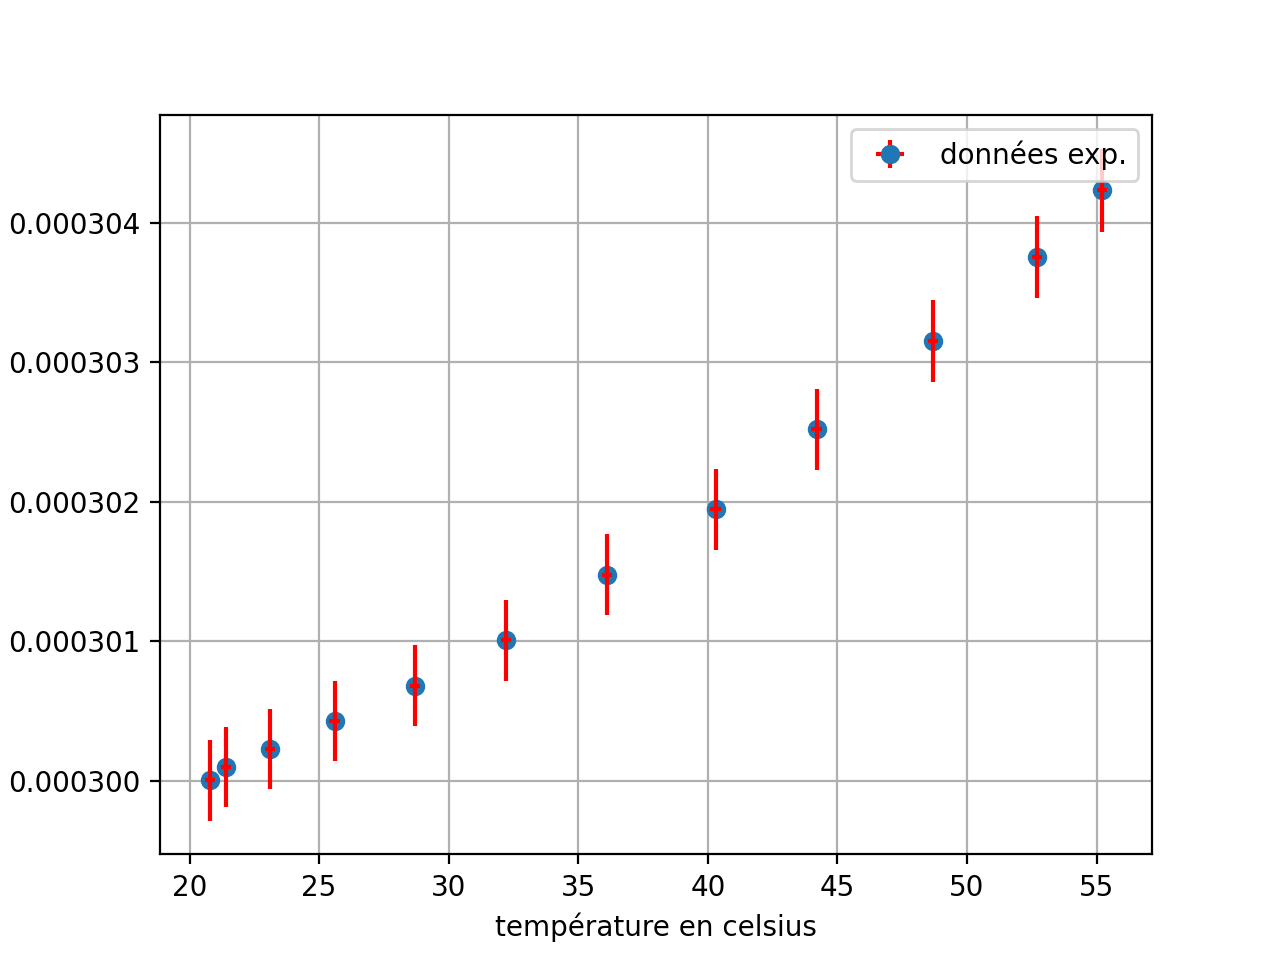

In [7]:
# Simulation de MC pour recalculer la liste V et ses barres d'incertitude
N = 10000
V = []
u_V = []

for j in range(len(H)):
    V_store = []
    for i in range(N):
        V_store.append(V0+u_V0*np.random.uniform(-1,1)+(H[j]+u_H[j]*np.random.uniform(-1,1))*np.pi*((d+u_d*np.random.uniform(-1,1))/2)**2)
    V.append(np.mean(V_store))
    u_V.append(np.std(V_store, ddof=1))

# on transforme les listes en arrays 
V=np.array(V)
u_V=np.array(u_V)

# on trace le nuage de points et ses incertitudes associées
plt.figure()
plt.grid(True)
plt.errorbar(temp, V, yerr=u_V, xerr=u_temp, fmt='o', ecolor='r',  barsabove=True, label="données exp.") # plot des valeurs mesurées
plt.legend()
plt.xlabel('température en celsius')
plt.ylabel('volume en cm^3')
plt.show()


La tendance exponentielle n'est pas très marquée, mais on peut néanmoins essayer d'utiliser la méthode `curve_fit`de la librairie `scipy`. </br>

Si le fit sur l'exponentielle ne converge pas et on peut alors procèder au DL de l'expression précédente (on vérifiera a posteriori que $\beta(T-T0)\ll 1$) qui donne : 
$$V(t)=V_0(1+\beta(T-T_0))$$

On essaye alors d'en déduire les valeurs de $V_0$ et $\beta$ par cette même méthode.

In [8]:
def vol_lin(x,a,b):
    return a*x+b

def vol_exp(x,a,b):
    return a*np.exp(b*x)

In [9]:
N = 100

# Méthode polyfit de numpy
a_num = []
b_num = []

# Méthode curve_fit de scipy
a_sci = []
b_sci = []
a_sci_exp = []
b_sci_exp = []

# Couche de simulation MC
for i in range(N):
    V_fit = V + u_V*np.random.uniform(-1,1,len(V))
    temp_fit = temp + u_temp*np.random.uniform(-1,1,len(temp))    
    # Méthode polyfit de numpy
    z = np.polyfit(temp_fit, V_fit,1)
    a_num.append(z[0])
    b_num.append(z[1])
    # Méthode curve_fit de scipy
    popt_sci, pcov_sci = curve_fit(vol_lin, temp_fit, V_fit)
    a_sci.append(popt_sci[0])
    b_sci.append(popt_sci[1])
    # Méthode curve_fit de scipy
    popt_sci_exp, pcov_sci_exp = curve_fit(vol_exp, temp_fit, V_fit, p0=[1.19e-7, 3.53e-9])
    a_sci_exp.append(popt_sci_exp[0])
    b_sci_exp.append(popt_sci_exp[1])
    
# Extraction des valeurs d'intérêts
V0_num = np.array(b_num) + temp[0]*np.array(a_num)
beta_num = np.array(a_num)/V0_num

# Extraction des valeurs moyennes et écarts-types
a_num_moy = np.mean(a_num)
b_num_moy = np.mean(b_num)
V0_num_moy, u_V0_num = np.mean(V0_num), np.std(V0_num,ddof=1)
beta_num_moy, u_beta_num = np.mean(beta_num), np.std(beta_num, ddof=1)
a_sci_moy=np.mean(a_sci)
b_sci_moy=np.mean(b_sci)
a_sci_exp_moy=np.mean(a_sci_exp)
b_sci_exp_moy=np.mean(b_sci_exp)
beta_sci_exp_moy, u_beta_sci_exp = np.mean(b_sci_exp), np.std(b_sci_exp, ddof=1)

<IPython.core.display.Javascript object>


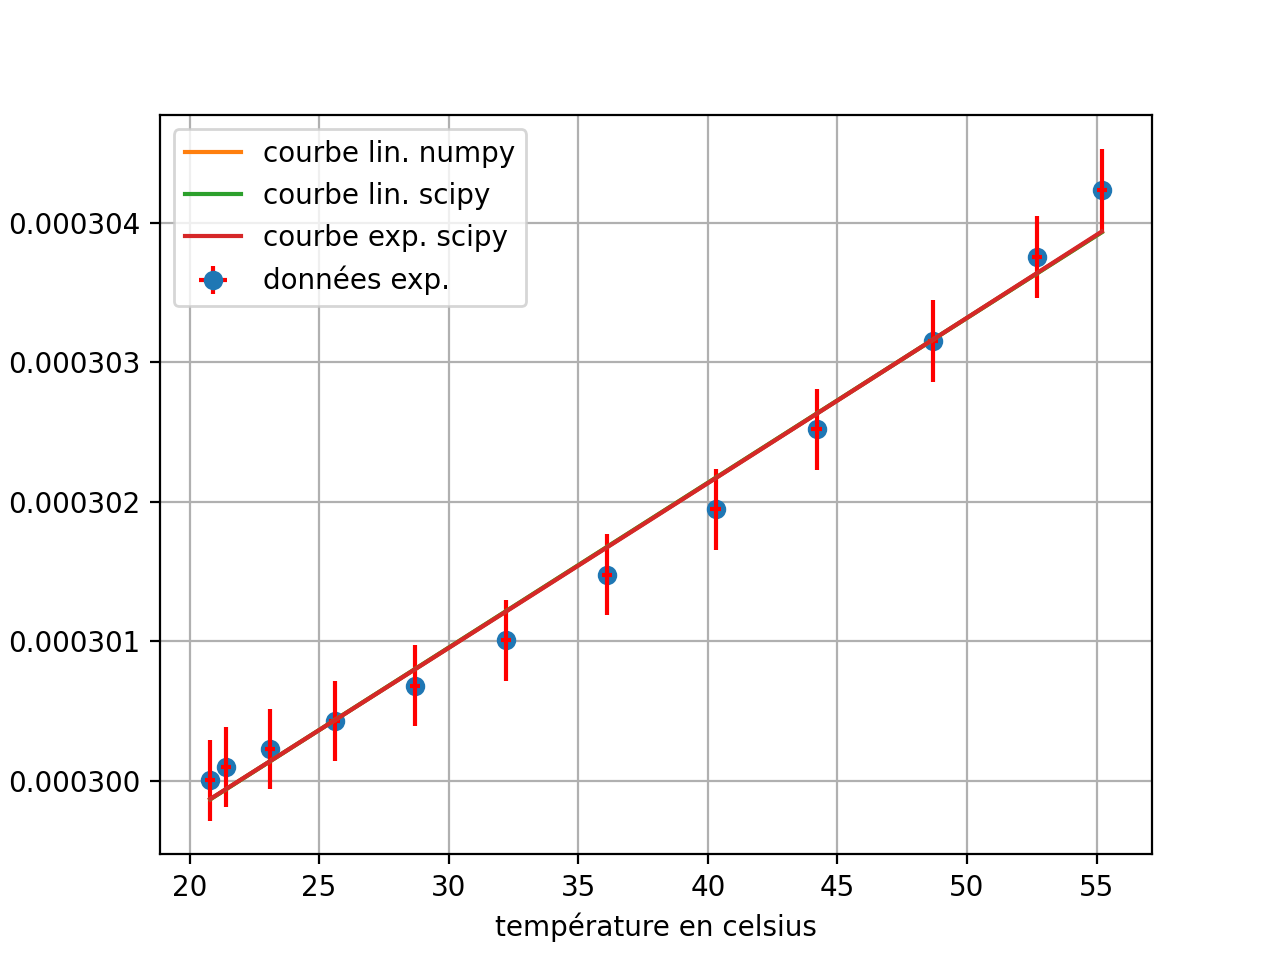

La valeur mesurée de beta par le fit exponentiel est de  3.92e-04 +/- 1.2e-05 K^-1
La valeur mesurée de beta par le fit linéaire est de  3.94e-04 +/- 1.2e-05 K^-1
 
Le volume initial déduit de la régression linéaire est  2.999e-04 m^3


In [10]:
plt.figure()
plt.grid(True)
plt.errorbar(temp, V, yerr=u_V, xerr=u_temp, fmt='o', ecolor='r',  barsabove=True, label="données exp.") # plot des valeurs mesurées
plt.plot(temp,a_num_moy*temp+b_num_moy, label="courbe lin. numpy") # plot de la courbe fittée
plt.plot(temp,vol_lin(temp, a_sci_moy,b_sci_moy), label="courbe lin. scipy") # plot de la courbe fittée
plt.plot(temp,vol_exp(temp, a_sci_exp_moy,b_sci_exp_moy), label="courbe exp. scipy") # plot de la courbe fittée

plt.legend()
plt.xlabel('température en celsius')
plt.ylabel('volume en m^3')
plt.show()

print("La valeur mesurée de beta par le fit exponentiel est de ",format(beta_sci_exp_moy,"#.2e"),"+/-",format(u_beta_sci_exp,"#.1e"),"K^-1")
print("La valeur mesurée de beta par le fit linéaire est de ",format(beta_num_moy,"#.2e"),"+/-",format(u_beta_num,"#.1e"),"K^-1")
print(" ")
print("Le volume initial déduit de la régression linéaire est ",format(V0_num_moy,"#.3e"),"m^3")

Le fit exponentiel est décevant et ne se différencie guère des régressions linéaires (identiques pour les deux méthodes), on essaie alors de mettre en forme les données avec : 
$$\ln V = \ln V_0 + \beta(T-T_0)$$

In [11]:
ln_V = []
u_ln_V = []
for i in range(len(V)):
    ln_V_store=[]
    for j in range(N):
        ln_V_store.append(np.log(V[i]+u_V[i]*np.random.uniform(-1,1)))
    ln_V.append(np.mean(ln_V_store))
    u_ln_V.append(np.std(ln_V_store, ddof=1))
    
ln_V=np.array(ln_V)
u_ln_V=np.array(u_ln_V)

In [12]:
# Méthode polyfit de numpy
a_ln_num = []
b_ln_num = []


# Couche de simulation MC
for i in range(N):
    ln_V_fit = ln_V + u_ln_V*np.random.uniform(-1,1,len(ln_V))
    temp_fit = temp + u_temp*np.random.uniform(-1,1,len(temp))    
    # Méthode polyfit de numpy
    z = np.polyfit(temp_fit, ln_V_fit,1)
    a_ln_num.append(z[0])
    b_ln_num.append(z[1])

# Extraction des valeurs moyennes et écarts-types
a_ln_num_moy, u_a_ln_num = np.mean(a_ln_num), np.std(a_ln_num, ddof=1)
b_ln_num_moy=np.mean(b_ln_num)

<IPython.core.display.Javascript object>


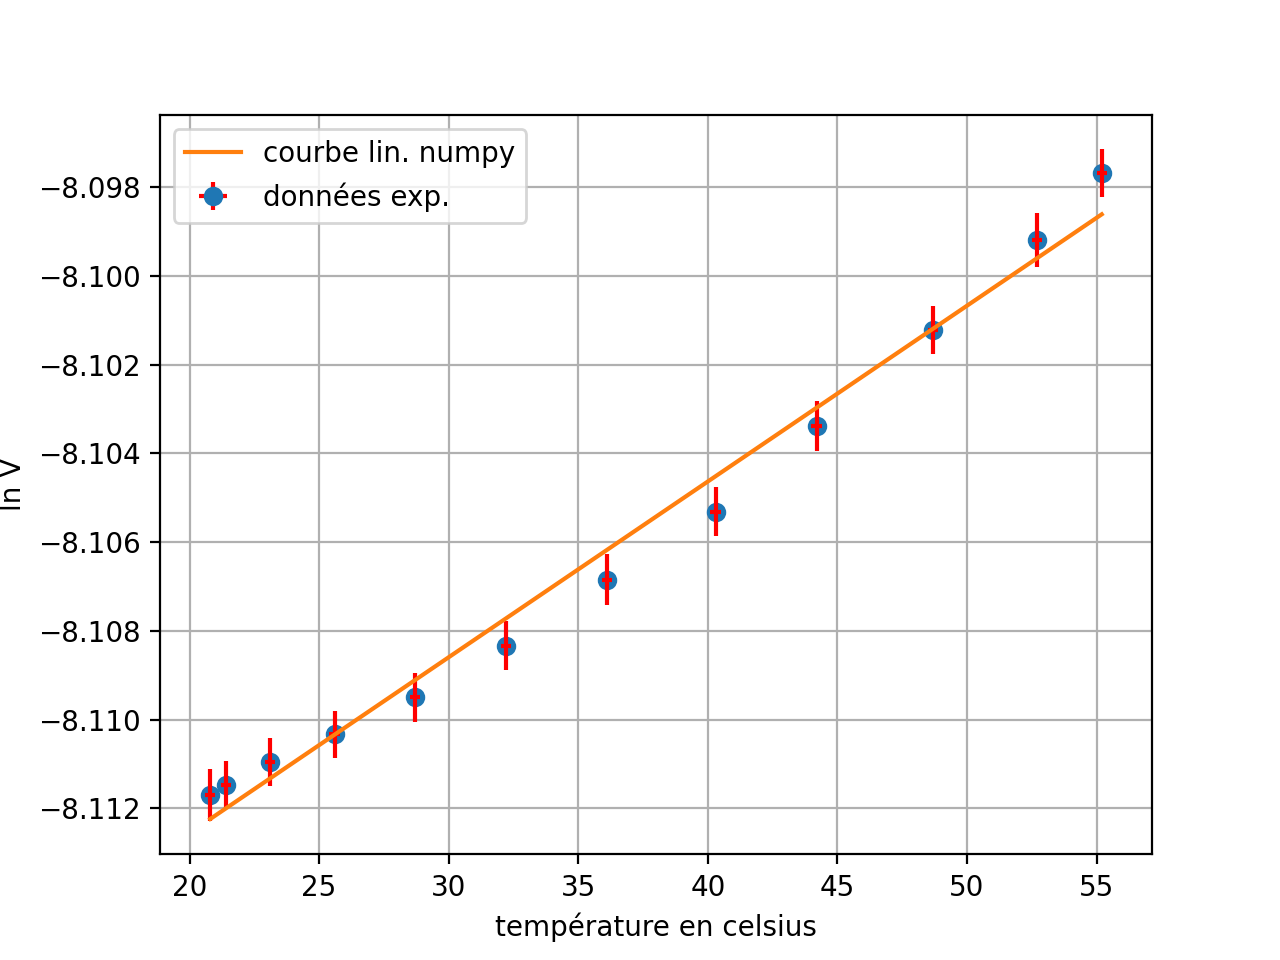

La valeur mesurée de la beta est de  3.96e-04 +/- 7.3e-06 K^-1


In [13]:
plt.figure()
plt.grid(True)
plt.errorbar(temp, ln_V, yerr=u_ln_V, xerr=u_temp, fmt='o', ecolor='r',  barsabove=True, label="données exp.") # plot des valeurs mesurées
plt.plot(temp,a_ln_num_moy*temp+b_ln_num_moy, label="courbe lin. numpy") # plot de la courbe fittée

plt.legend()
plt.xlabel('température en celsius')
plt.ylabel('ln V')
plt.show()

print("La valeur mesurée de la beta est de ",format(a_ln_num_moy,"#.2e"),"+/-",format(u_a_ln_num,"#.1e"),"K^-1")